In [21]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import load_img

from tensorflow.keras.preprocessing import image
import tensorflow as tf  
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
import cv2
from keras.models import load_model

In [49]:
#load data
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [50]:
#Normalization
X_train=X_train/255
X_test=X_test/255

In [51]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)

In [52]:
Y_train=to_categorical(Y_train)   
Y_test=to_categorical(Y_test)

In [73]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)

In [74]:
#model creation
model=Sequential()
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
#model training
history = model.fit(train_generator, validation_data=(X_test, Y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 88s 46ms/step - loss: 0.7215 - accuracy: 0.7763 - val_loss: 0.1248 - val_accuracy: 0.9593
Epoch 2/30
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2533 - accuracy: 0.9293 - val_loss: 0.0695 - val_accuracy: 0.9771
Epoch 3/30
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1850 - accuracy: 0.9472 - val_loss: 0.0854 - val_accuracy: 0.9733
Epoch 4/30
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1595 - accuracy: 0.9560 - val_loss: 0.0662 - val_accuracy: 0.9805
Epoch 5/30
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1440 - accuracy: 0.9614 - val_loss: 0.0766 - val_accuracy: 0.9774
Epoch 6/30
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1304 - accuracy: 0.9649 - val_loss: 0.0500 - val_accuracy: 0.9856
Epoch 7/30
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1195 - accuracy: 0.9676 - val_loss: 0.0723 -

In [76]:
model.save("mnist.h5")

### Model Evaluation

In [81]:
Y_pred=np.argmax(model.predict([X_test]),axis=1)

313/313 [==============================] - 4s 14ms/step


In [82]:
Y_true=np.argmax(Y_test, axis=1)
Y_true

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [83]:
Y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

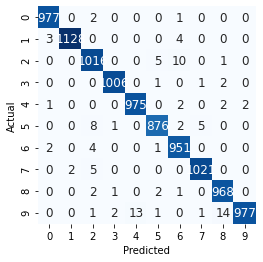

In [84]:
#Confusion matrix
cm=confusion_matrix(Y_true, Y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_true), index = np.unique(Y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,square=True, fmt="d", cmap="Blues")

In [85]:
#Classification Report
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.98      0.98      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

